In [4]:
import pandas as pd
from datetime import datetime
import fsspec
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

StatementMeta(, 8e997ffd-824e-4944-9666-2689af09e71d, 6, Finished, Available, Finished)

In [5]:
import pandas as pd

sparkDF = spark.sql("SELECT * FROM bronze_lakehouse.green_tripdata_2017")
green_taxi_data = sparkDF.toPandas()

StatementMeta(, 8e997ffd-824e-4944-9666-2689af09e71d, 7, Finished, Available, Finished)

StatementMeta(, 8e997ffd-824e-4944-9666-2689af09e71d, 8, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_ol

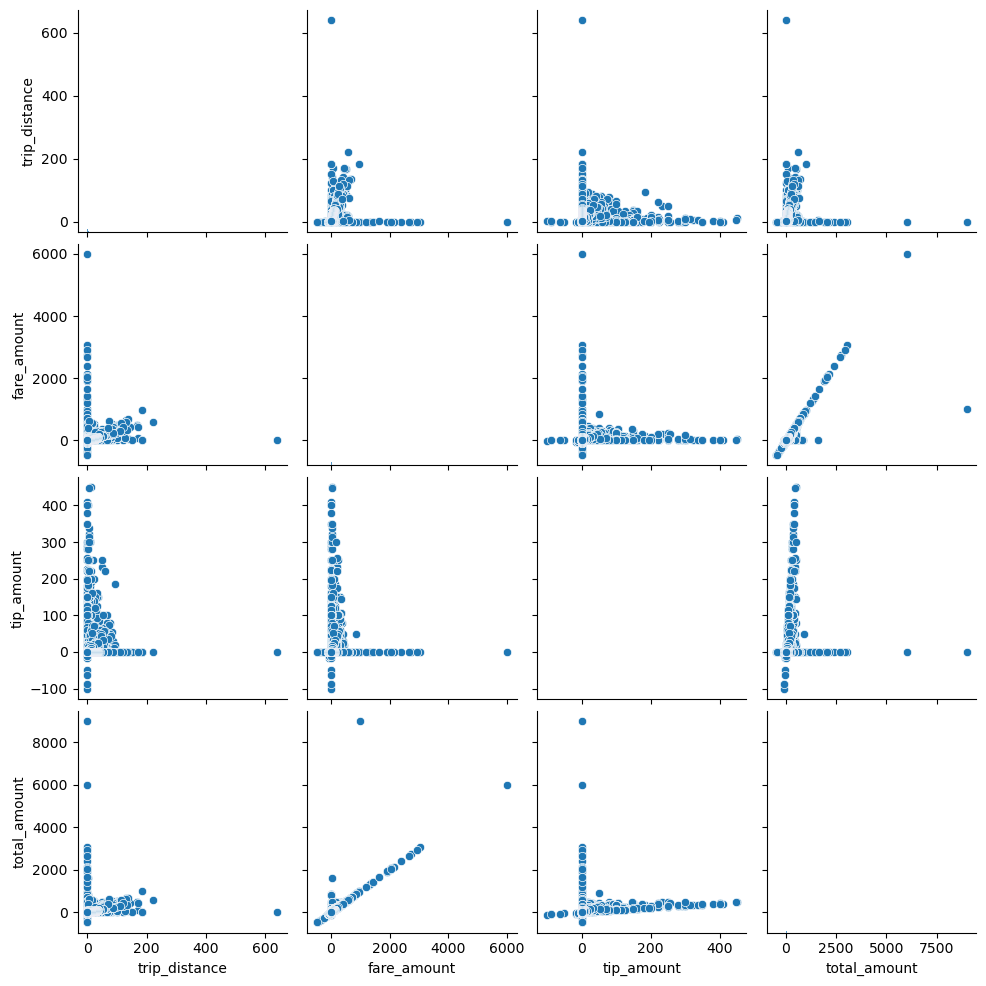

In [6]:
# Pairplot for numerical variables
sns.pairplot(green_taxi_data[['trip_distance', 'fare_amount', 'tip_amount', 'total_amount']])
plt.show()

StatementMeta(, 8e997ffd-824e-4944-9666-2689af09e71d, 9, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


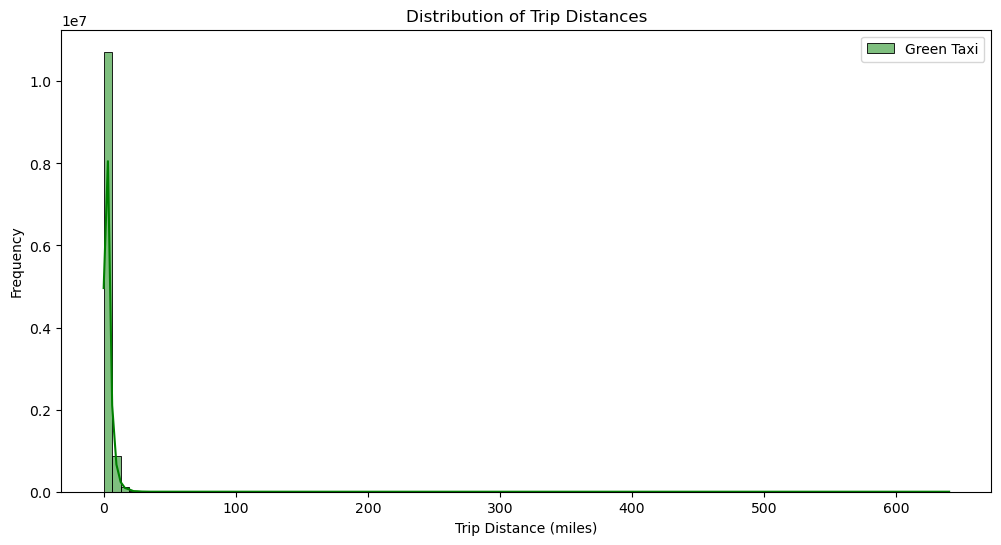

In [7]:
# Distribution of trip distances
plt.figure(figsize=(12, 6))
sns.histplot(data=green_taxi_data, x='trip_distance', bins=100, kde=True, color='green', label='Green Taxi')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Trip Distances')
plt.show()

StatementMeta(, 8e997ffd-824e-4944-9666-2689af09e71d, 10, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


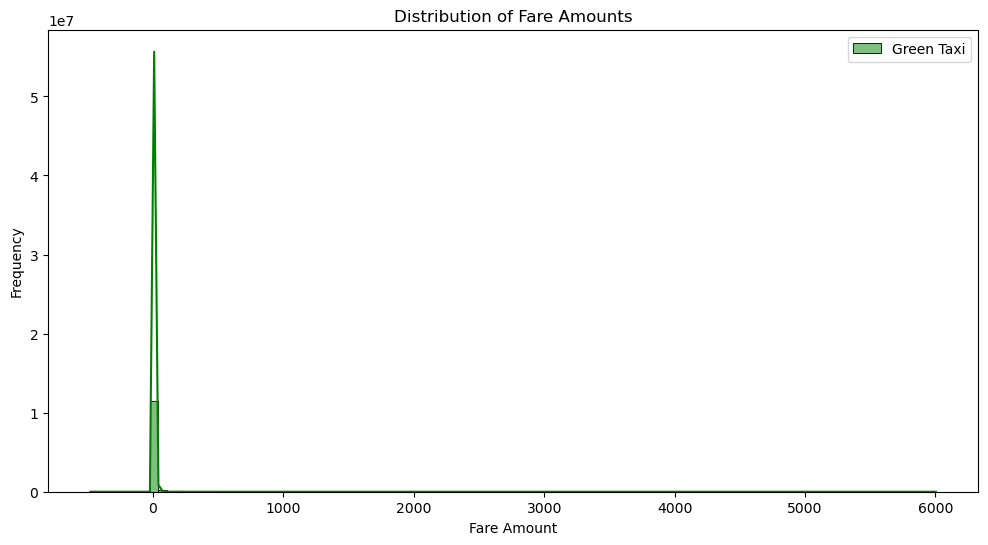

In [8]:
# Distribution of fare amounts
plt.figure(figsize=(12, 6))
sns.histplot(data=green_taxi_data, x='fare_amount', bins=100, kde=True, color='green', label='Green Taxi')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Fare Amounts')
plt.show()

StatementMeta(, 8e997ffd-824e-4944-9666-2689af09e71d, 12, Finished, Available, Finished)

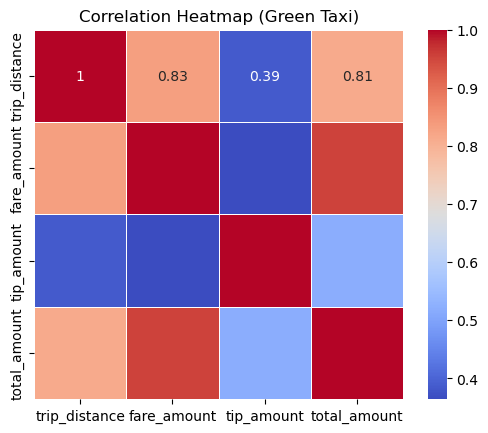

In [10]:
sns.heatmap(correlation_matrix_green, annot=True, cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Heatmap (Green Taxi)')
plt.show()

In [11]:
# Customer Preferences Analysis 1: Payment Type Distribution

# Calculate the distribution of payment types for green taxis
green_payment_distribution = green_taxi_data['payment_type'].value_counts(normalize=True)

StatementMeta(, 8e997ffd-824e-4944-9666-2689af09e71d, 13, Finished, Available, Finished)

In [13]:
# Cost Impact Analysis 1: Fuel Costs
# Assuming a fuel cost per mile (you may replace this with actual data)
fuel_cost_per_mile = 0.3  # Example value, replace with actual data

# Calculate total fuel costs for yellow and green taxis
green_taxi_data['fuel_cost'] = green_taxi_data['trip_distance'] * fuel_cost_per_mile

total_fuel_cost_green = green_taxi_data['fuel_cost'].sum()

StatementMeta(, 8e997ffd-824e-4944-9666-2689af09e71d, 15, Finished, Available, Finished)

In [14]:
print(total_fuel_cost_green)

StatementMeta(, 8e997ffd-824e-4944-9666-2689af09e71d, 16, Finished, Available, Finished)

9452158.493999993


In [15]:
# Cost Impact Analysis 2: Maintenance Costs
# Assuming a maintenance cost per mile (you may replace this with actual data)
maintenance_cost_per_mile = 0.1  # Example value, replace with actual data

# Calculate total maintenance costs for yellow and green taxis
green_taxi_data['maintenance_cost'] = green_taxi_data['trip_distance'] * maintenance_cost_per_mile

total_maintenance_cost_green = green_taxi_data['maintenance_cost'].sum()

StatementMeta(, 8e997ffd-824e-4944-9666-2689af09e71d, 17, Finished, Available, Finished)

In [16]:
print(total_maintenance_cost_green)

StatementMeta(, 8e997ffd-824e-4944-9666-2689af09e71d, 18, Finished, Available, Finished)

3150719.4980000034


In [17]:
# Cost Impact Analysis 3: Total Revenue
total_revenue_green = green_taxi_data['total_amount'].sum()

# Cost Impact Analysis 4: Profit Analysis
# Calculate profit for yellow and green taxis
green_taxi_data['profit'] = green_taxi_data['total_amount'] - (green_taxi_data['fuel_cost'] + green_taxi_data['maintenance_cost'])

total_profit_green = green_taxi_data['profit'].sum()

StatementMeta(, 8e997ffd-824e-4944-9666-2689af09e71d, 19, Finished, Available, Finished)

In [18]:
print(total_profit_green)

StatementMeta(, 8e997ffd-824e-4944-9666-2689af09e71d, 20, Finished, Available, Finished)

154552999.18799958


In [19]:
# Comparison 1: Trip Distance
mean_trip_distance_green = green_taxi_data['trip_distance'].mean()

print(f"Mean Trip Distance (Green Taxi): {mean_trip_distance_green:.2f} miles")

StatementMeta(, 8e997ffd-824e-4944-9666-2689af09e71d, 21, Finished, Available, Finished)

Mean Trip Distance (Green Taxi): 2.68 miles


In [20]:
# Comparison 2: Fare Amount
mean_fare_amount_green = green_taxi_data['fare_amount'].mean()

print(f"Mean Fare Amount (Green Taxi): ${mean_fare_amount_green:.2f}")

StatementMeta(, 8e997ffd-824e-4944-9666-2689af09e71d, 22, Finished, Available, Finished)

Mean Fare Amount (Green Taxi): $11.80


In [21]:
# Comparison 3: Average Tip Amount
mean_tip_amount_green = green_taxi_data['tip_amount'].mean()

print(f"Mean Tip Amount (Green Taxi): ${mean_tip_amount_green:.2f}")

StatementMeta(, 8e997ffd-824e-4944-9666-2689af09e71d, 23, Finished, Available, Finished)

Mean Tip Amount (Green Taxi): $1.15


StatementMeta(, 8e997ffd-824e-4944-9666-2689af09e71d, 24, Finished, Available, Finished)

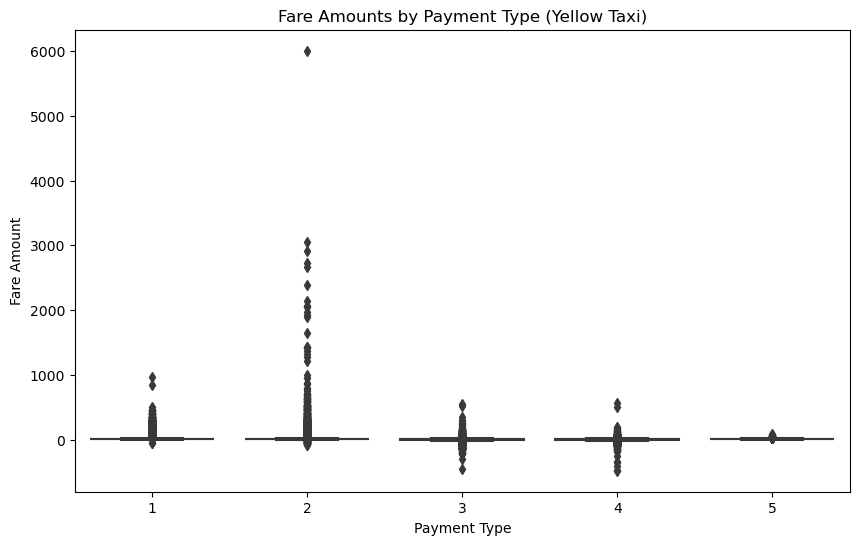

In [22]:
# Visualization 2: Boxplot of Fare Amounts by Payment Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=green_taxi_data, x='payment_type', y='fare_amount', palette='YlGnBu')
plt.xlabel('Payment Type')
plt.ylabel('Fare Amount')
plt.title('Fare Amounts by Payment Type (Yellow Taxi)')
plt.show()